# Import Libraries

In [42]:
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Read Dataset

In [23]:
df = pd.read_csv("diabetess.csv")

# Feature Engineering

In [24]:
df.shape

(768, 9)

In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [27]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [28]:
df.duplicated().sum()

np.int64(0)

In [29]:
z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))

outliers = (z_scores > 3).sum(axis=1)
print("Number of outliers:", outliers.sum())

Number of outliers: 42


In [30]:
df_clean = df[(z_scores < 3).all(axis=1)]
print(f"Data after removing outliers: {df_clean.shape}")

Data after removing outliers: (729, 9)


In [31]:
z_scores = zscore(df_clean.select_dtypes(include=['float64', 'int64']))

outliers = (z_scores > 3).sum(axis=1)
print("Number of outliers:", outliers.sum())

Number of outliers: 22


# EDA

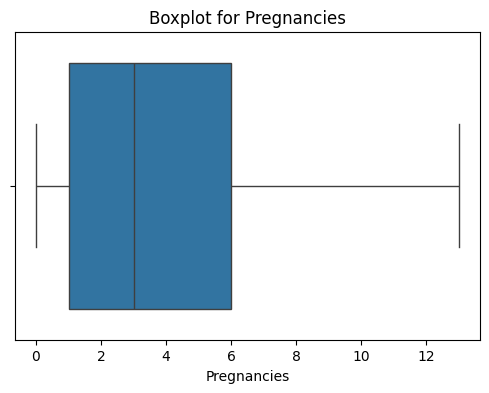

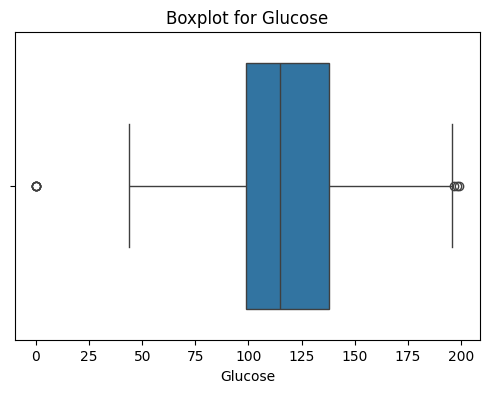

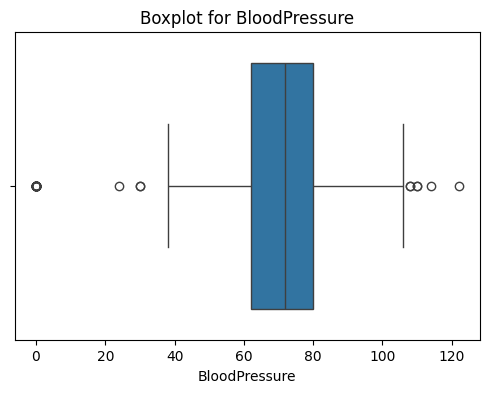

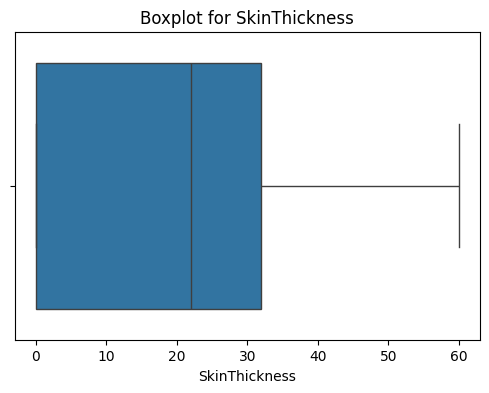

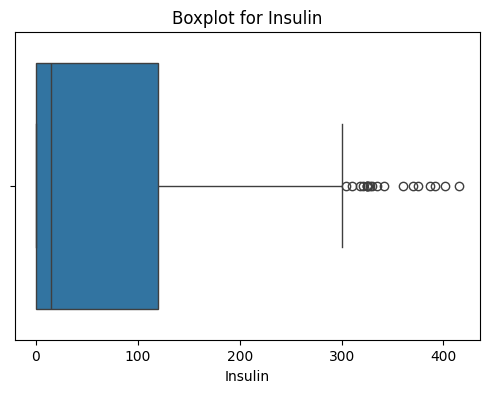

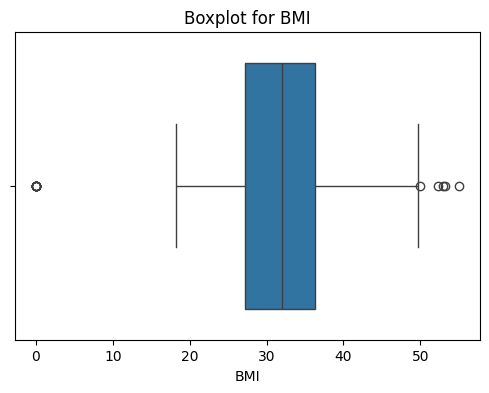

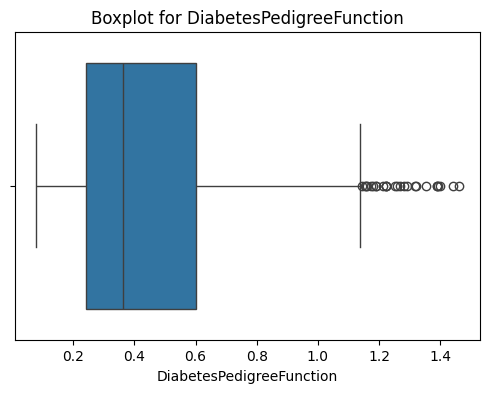

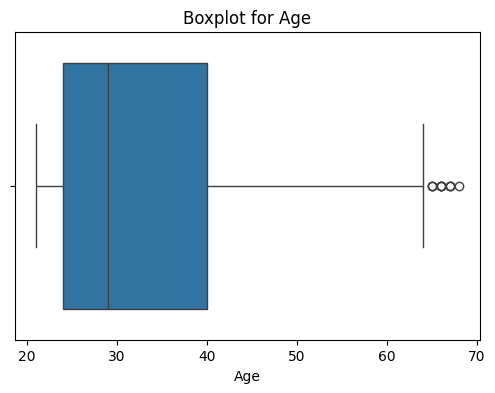

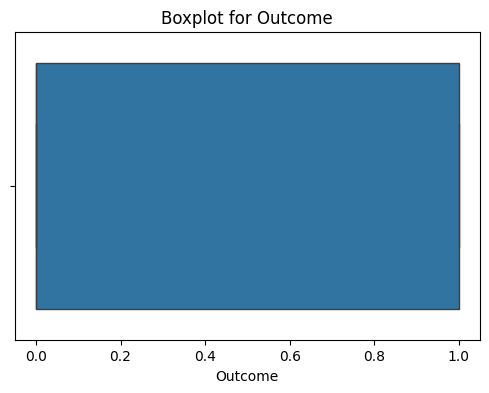

In [32]:
numerical_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_clean[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

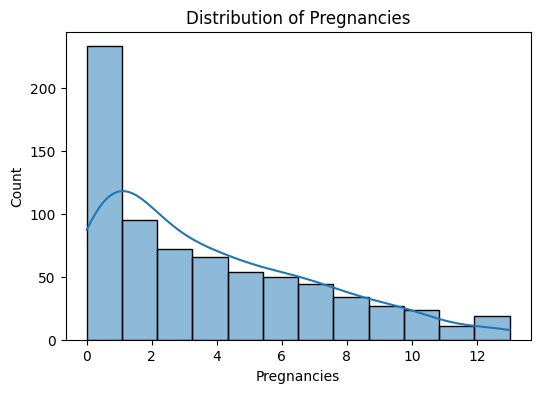

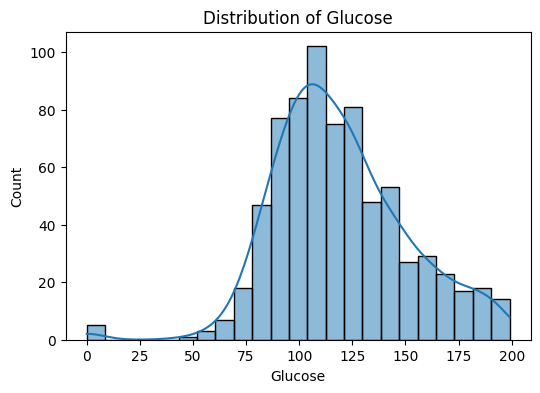

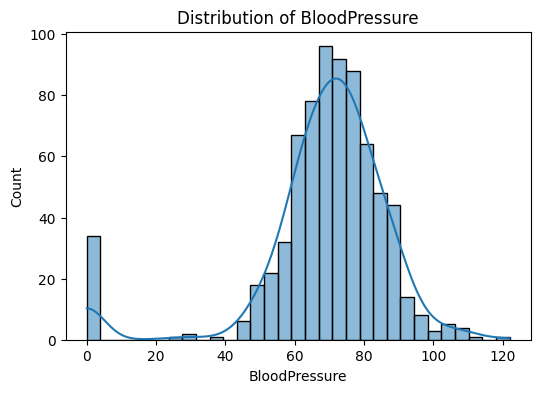

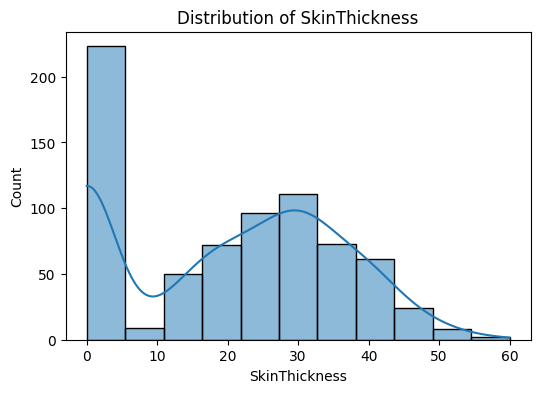

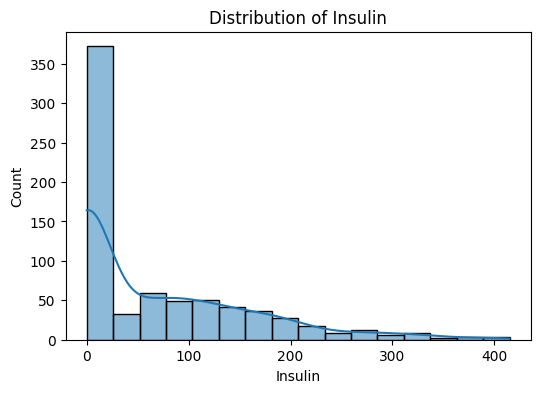

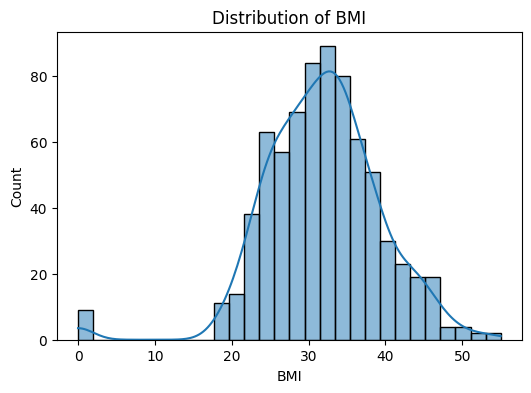

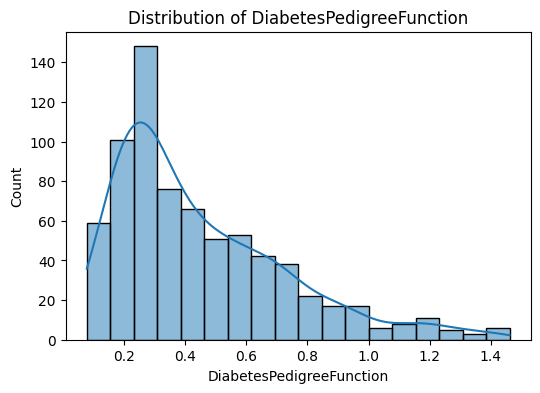

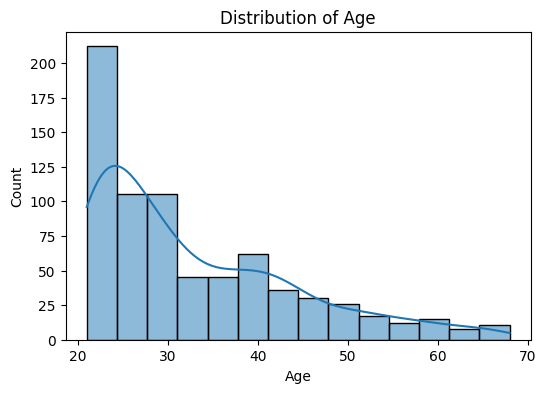

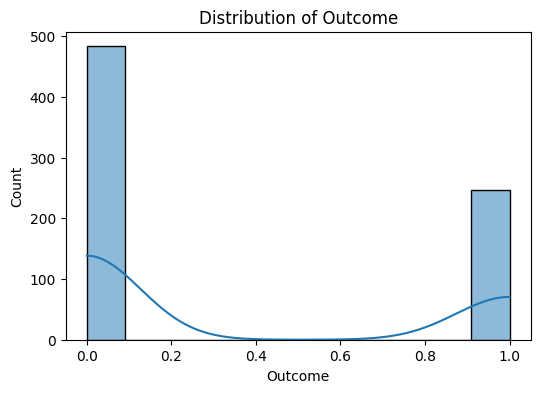

In [33]:
numerical_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

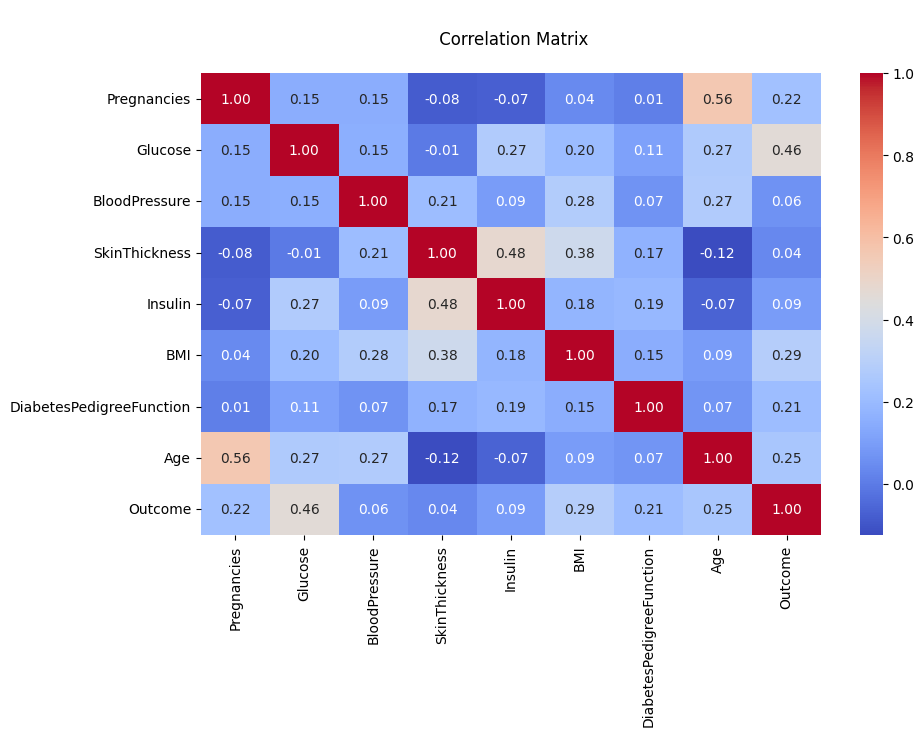

In [34]:
correlation_matrix = df_clean.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('\n Correlation Matrix\n')
plt.show()

# Features and Target split with Train Test split

In [35]:
X = df_clean.drop(['Outcome'], axis = 1)
Y = df_clean['Outcome']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=23, test_size = 0.2)

# Scaling

In [37]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Model Training [Random Forest]

In [38]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(x_train_scaled, y_train)

best_rf = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [39]:
y_pred_best = best_rf.predict(x_test_scaled)

# Model Evaluation [Random Forest]

In [40]:
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Tuned Accuracy: 0.773972602739726
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        93
           1       0.76      0.55      0.64        53

    accuracy                           0.77       146
   macro avg       0.77      0.73      0.74       146
weighted avg       0.77      0.77      0.76       146



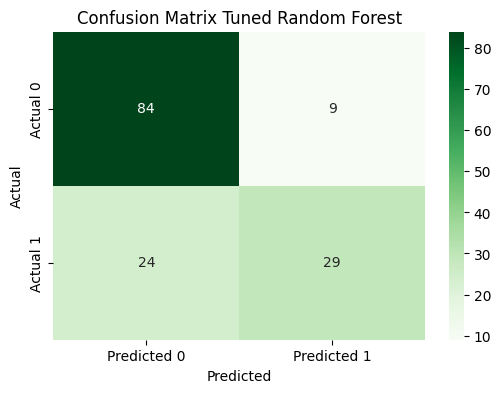

In [43]:
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Tuned Random Forest')
plt.show()

# Model Training [Logistic Regression]

In [44]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train_scaled, y_train)

y_pred_log = log_reg.predict(x_test_scaled)

# Model Evaluation [Logistic Regression]

In [45]:
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Accuracy: 0.8013698630136986
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        93
           1       0.85      0.55      0.67        53

    accuracy                           0.80       146
   macro avg       0.82      0.75      0.76       146
weighted avg       0.81      0.80      0.79       146



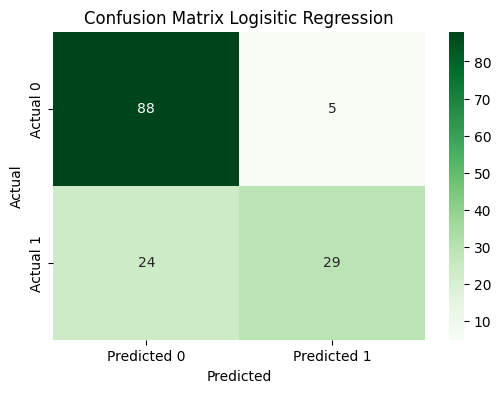

In [46]:
cm = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logisitic Regression')
plt.show()